<a href="https://colab.research.google.com/github/C0pyBara/Project_S/blob/main/RNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sqlalchemy import create_engine
from google.colab import drive
drive.mount('/content/drive')
conn = sqlite3.connect('data.db')  # Замените 'your_database.db' на имя вашей базы данных

# Запрос для получения списка всех таблиц в базе данных
tables_query = "SELECT name FROM sqlite_master WHERE type='table';"
tables = pd.read_sql(tables_query, conn)

# Вывод списка таблиц
print(tables)

Mounted at /content/drive


NameError: name 'sqlite3' is not defined

In [ ]:
import pandas as pd
import sqlite3
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.preprocessing import MinMaxScaler

# Подключение к базе данных SQLite
conn = sqlite3.connect('data.db')

# Загрузка данных из базы данных в DataFrame с помощью pandas
query = "SELECT * FROM irkutsk"  # Замените 'your_table_name' на имя вашей таблицы в базе данных
data = pd.read_sql(query, conn)

# Преобразование времени в метки времени Unix
data['hourNumber'] = pd.to_datetime(data['hourNumber'])
data['time_unix'] = data['hourNumber'].astype(int) // 10**9  # Преобразование в секунды

# Удаление столбцов, которые не являются признаками для предсказания (например, идентификаторы и временные метки)
columns_to_exclude = ['hourNumber']  # Укажите столбцы, которые не нужны для предсказания
X = data.drop(columns=columns_to_exclude).values

# Масштабирование данных
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Разделение данных на обучающий и тестовый наборы
X_train, X_test = train_test_split(X_scaled, test_size=0.2, random_state=42)

# Создание модели LSTM
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=50))
model.add(Dropout(0.2))
model.add(Dense(units=X_train.shape[1]))  # Количество нейронов в выходном слое равно количеству признаков

# Компиляция модели
model.compile(optimizer='adam', loss='mean_squared_error')

# Обучение модели
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
model.fit(X_train, X_train, epochs=50, batch_size=32, validation_data=(X_test, X_test), callbacks=[early_stopping])

# Прогнозирование
predictions = model.predict(X_test)




Epoch 1/50
1752/1752 [==============================] - 32s 15ms/step - loss: 0.0157 - val_loss: 0.0041
Epoch 2/50
1752/1752 [==============================] - 24s 13ms/step - loss: 0.0038 - val_loss: 7.7891e-04
Epoch 3/50
1752/1752 [==============================] - 27s 16ms/step - loss: 0.0023 - val_loss: 3.7267e-04
Epoch 4/50
1752/1752 [==============================] - 25s 14ms/step - loss: 0.0019 - val_loss: 2.8145e-04
Epoch 5/50
1752/1752 [==============================] - 24s 14ms/step - loss: 0.0017 - val_loss: 2.1681e-04
Epoch 6/50
1752/1752 [==============================] - 26s 15ms/step - loss: 0.0016 - val_loss: 2.7636e-04
Epoch 7/50
1752/1752 [==============================] - 24s 13ms/step - loss: 0.0016 - val_loss: 1.8690e-04
Epoch 8/50
1752/1752 [==============================] - 28s 16ms/step - loss: 0.0016 - val_loss: 1.6223e-04
Epoch 9/50
1752/1752 [==============================] - 25s 14ms/step - loss: 0.0015 - val_loss: 2.2258e-04
Epoch 10/50
1752/1752 [=========

In [ ]:
# Загрузка данных из базы данных в DataFrame с помощью pandas
query2 = "SELECT * FROM Irkutsk"  # Замените 'your_table_name' на имя вашей таблицы в базе данных
data2 = pd.read_sql(query2, conn)

# Удаление столбцов, которые не являются признаками для предсказания (например, идентификаторы и временные метки)
columns_to_exclude = ['hourNumber']  # Укажите столбцы, которые не нужны для предсказания
X2 = data2.drop(columns=columns_to_exclude).values
#X2 = data2.head(1000)  # Например, если вы хотите использовать только первые 1000 строк данных
# Масштабирование новых данных
scaler = MinMaxScaler()
new_data_scaled = scaler.fit_transform(X2)

# Использование модели для предсказаний на новых данных
predictions_new_data = model.predict(new_data_scaled)
#predictions_1h = predictions_new_data[:, 0] #ограничение выходных данных
print(predictions_new_data)


2/2 [==============================] - 0s 8ms/step
[[0.25885233 0.54918486 0.41702098 0.2600001  0.43109456 0.31520247
  0.44788843]
 [0.2654982  0.5627356  0.42582703 0.26786667 0.4436006  0.32524407
  0.45841882]
 [0.27416992 0.58366746 0.44255945 0.27593872 0.45768565 0.33570215
  0.47363508]
 [0.26590738 0.56677526 0.43157807 0.26614258 0.44209468 0.3231025
  0.46051443]
 [0.25483608 0.54443085 0.41700968 0.25308517 0.42142084 0.3064646
  0.44308126]
 [0.24994138 0.534656   0.4106265  0.24733223 0.4123509  0.29919022
  0.43542358]
 [0.2443611  0.52358395 0.40336397 0.24085157 0.40215248 0.29106164
  0.42675555]
 [0.23647021 0.508095   0.39327636 0.23158272 0.38764015 0.2794655
  0.41452312]
 [0.21298291 0.4576965  0.35638413 0.20696206 0.3474874  0.24909577
  0.37622097]
 [0.20807363 0.4484297  0.3504146  0.20118989 0.33857733 0.24204868
  0.3687654 ]
 [0.19456755 0.4212721  0.33139193 0.18657477 0.31540996 0.22447209
  0.34766215]
 [0.19456755 0.4212721  0.33139193 0.18657477 0.31

МОдель LSTM  

1/1 [==============================] - 0s 24ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


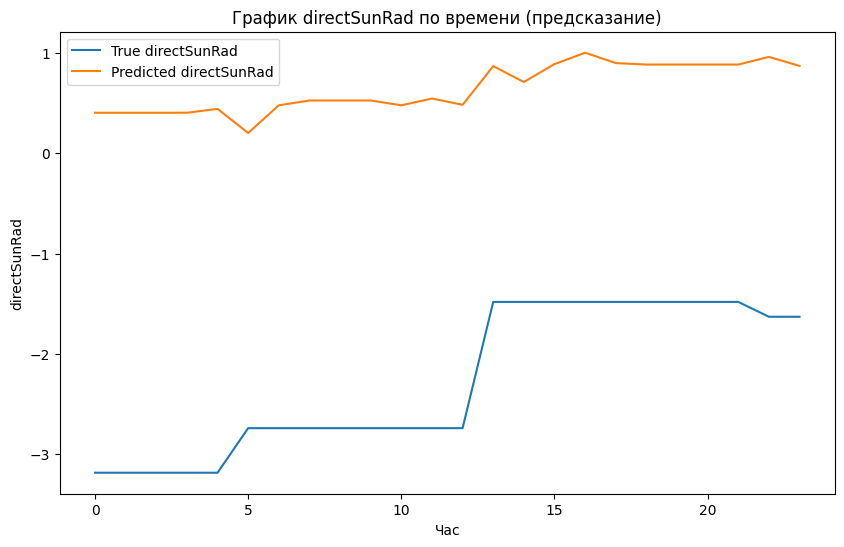

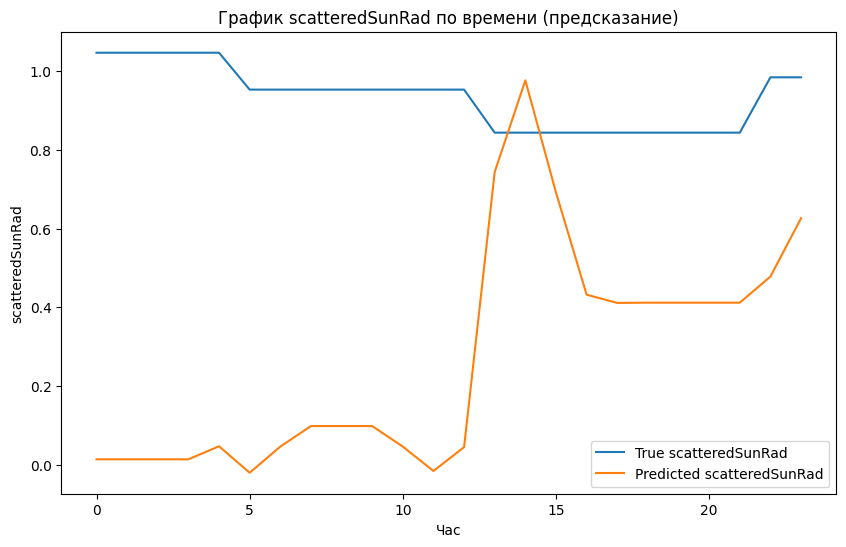

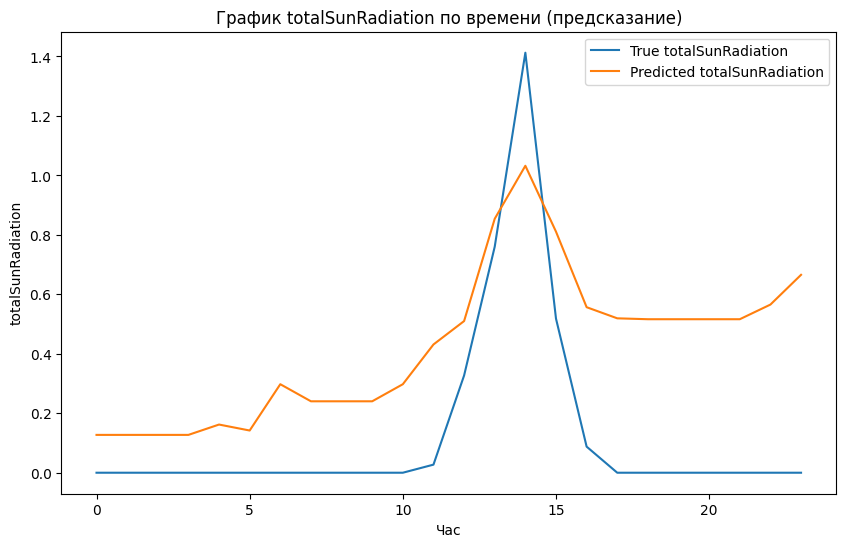

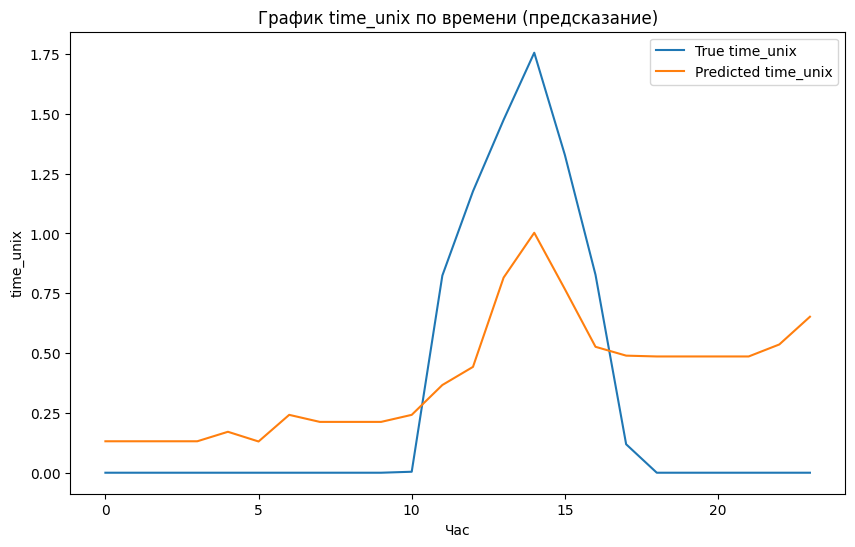

IndexError: index 8 is out of bounds for axis 0 with size 8

<Figure size 1000x600 with 0 Axes>

In [ ]:
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from scipy.stats import yeojohnson
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

# Подключение к базе данных SQLite
conn = sqlite3.connect('data.db')

# Загрузка данных из базы данных в DataFrame с помощью pandas
query = """
    SELECT * FROM babushkin UNION ALL
    SELECT * FROM baikalsk UNION ALL
    SELECT * FROM barguzin UNION ALL
    SELECT * FROM bolshoeGoloustnoye UNION ALL
    SELECT * FROM goryachinsk UNION ALL
    SELECT * FROM kabansk UNION ALL
    SELECT * FROM karam UNION ALL
    SELECT * FROM kultuk UNION ALL
    SELECT * FROM kurumkan UNION ALL
    SELECT * FROM nizhneangarsk UNION ALL
    SELECT * FROM tanhoi UNION ALL
    SELECT * FROM tirka UNION ALL
    SELECT * FROM uzury
"""
data = pd.read_sql(query, conn)

# Замена 'None' на NaN
data.replace('None', pd.NA, inplace=True)

# Преобразование времени в метки времени Unix
data['hourNumber'] = pd.to_datetime(data['hourNumber'])
data['time_unix'] = data['hourNumber'].astype(int) // 10**9  # Преобразование в секунды

# Удаление столбцов, которые не являются признаками для предсказания (например, идентификаторы и временные метки)
columns_to_exclude = ['hourNumber']  # Укажите столбцы, которые не нужны для предсказания
X = data.drop(columns=columns_to_exclude).values

# Используем SimpleImputer для заполнения пропущенных значений медианой
imputer = SimpleImputer(strategy='median')
X_imputed = imputer.fit_transform(X)

# Преобразуем обратно в DataFrame
data_imputed = pd.DataFrame(data=X_imputed, columns=data.columns[1:])

# Используем Йео-Джонсона для преобразования
for column in data_imputed.columns:
    data_imputed[column], _ = yeojohnson(data_imputed[column] + 1)  # Добавляем 1, чтобы избежать ошибки при логарифмировании нулевых значений

# Масштабирование данных
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(data_imputed)

# Разделение данных на обучающий и тестовый наборы
X_train, X_test = train_test_split(X_scaled, test_size=0.2, random_state=42)

# Создание модели LSTM
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=50))
model.add(Dropout(0.2))
model.add(Dense(units=X_train.shape[1]))  # Количество нейронов в выходном слое равно количеству признаков

# Компиляция модели
model.compile(optimizer='adam', loss='mean_squared_error')

# Обучение модели
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
model.fit(X_train, X_train, epochs=50, batch_size=32, validation_data=(X_test, X_test), callbacks=[early_stopping])

# Прогнозирование
predictions = model.predict(X_test)

# ... (ваш код для сравнения и визуализации результатов)
# Загрузка данных из таблицы testirk для сравнения
query_testirk = "SELECT * FROM testirk"
data_testirk = pd.read_sql(query_testirk, conn)

# Загрузка истинных значений для сравнения
query_testirk2 = "SELECT * FROM testirk2"
data_testirk2 = pd.read_sql(query_testirk2, conn)

# Определение столбцов для исключения из данных
columns_to_exclude_testirk = ['hourNumber']  # Укажите столбцы, которые не нужны для масштабирования
numeric_columns_testirk = data_testirk.drop(columns=columns_to_exclude_testirk).select_dtypes(include=['float64', 'int64']).columns

# Использование только числовых столбцов для обучения масштабировщика
scaler_testirk = MinMaxScaler()
scaler_testirk.fit(data_testirk[numeric_columns_testirk])  # Масштабирование данных testirk

# Масштабирование данных из testirk
X_testirk_scaled = scaler_testirk.transform(data_testirk[numeric_columns_testirk].values)

# Прогнозирование на данных из таблицы testirk
predictions_testirk = model.predict(X_testirk_scaled)

# Удаление первого столбца
predictions_testirk = predictions_testirk[:, 1:]


# Масштабирование данных из testirk2
X_testirk2_scaled = scaler_testirk.transform(data_testirk2[numeric_columns_testirk].values)

# Построение графиков для каждого числового признака
for i, column in enumerate(data_testirk2.columns):
    if column not in columns_to_exclude_testirk:
        plt.figure(figsize=(10, 6))
        plt.plot(X_testirk2_scaled[:, i], label=f'True {data.columns[i + 3]}')
        plt.plot(predictions_testirk[:, i], label=f'Predicted {data.columns[i + 3]}')
        plt.title(f'График {data.columns[i + 3]} по времени (предсказание)')
        plt.xlabel('Час')
        plt.ylabel(data.columns[i + 3])
        plt.legend()
        plt.show()


2/2 [==============================] - 0s 8ms/step


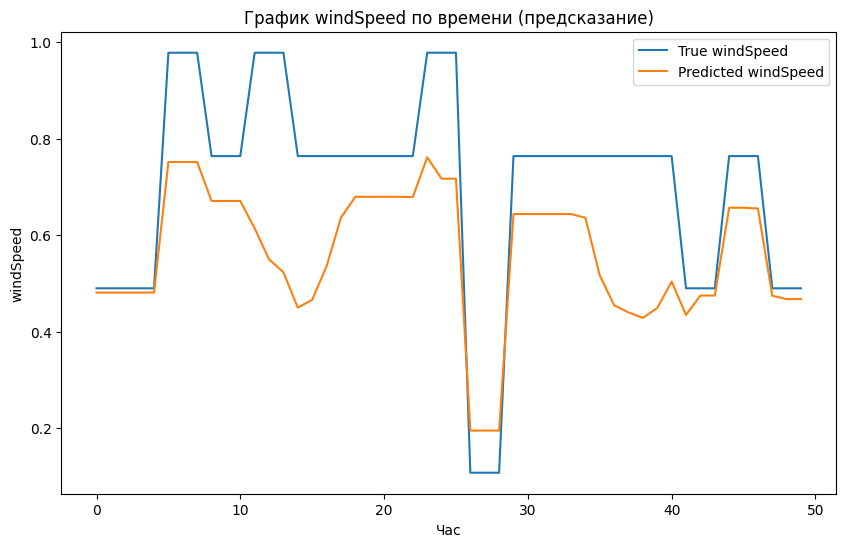

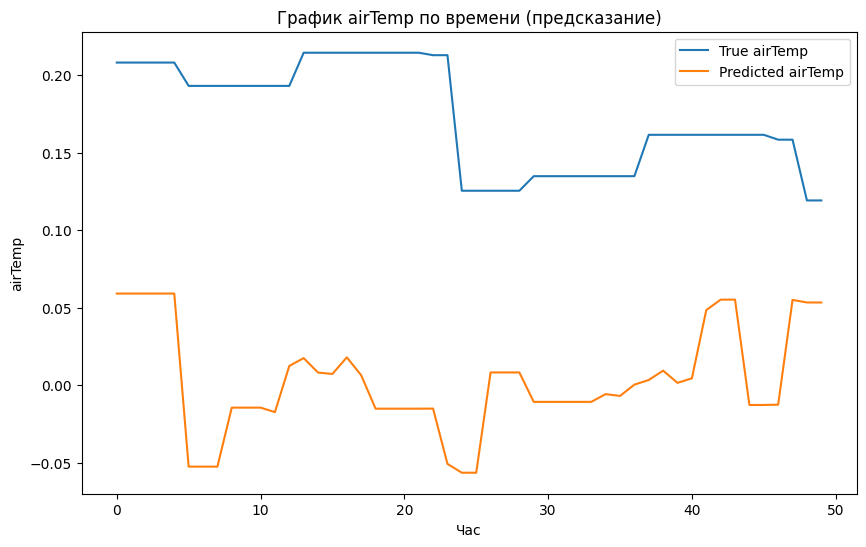

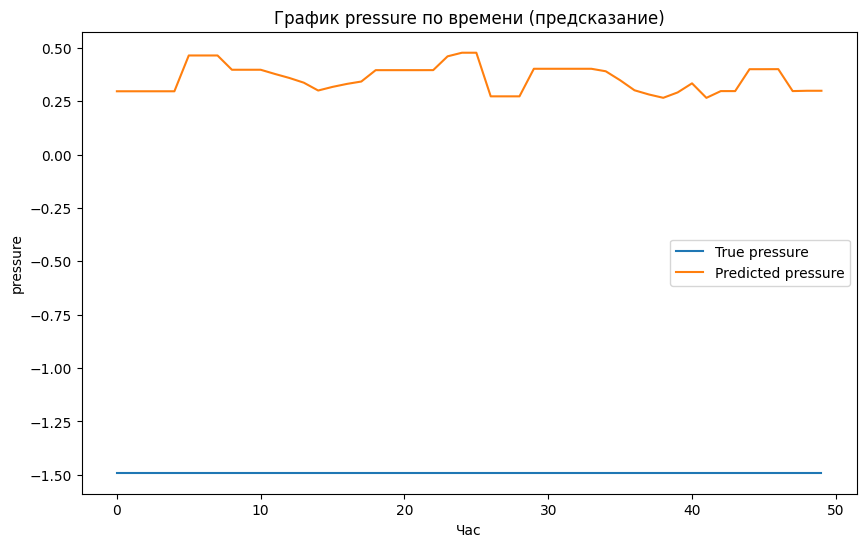

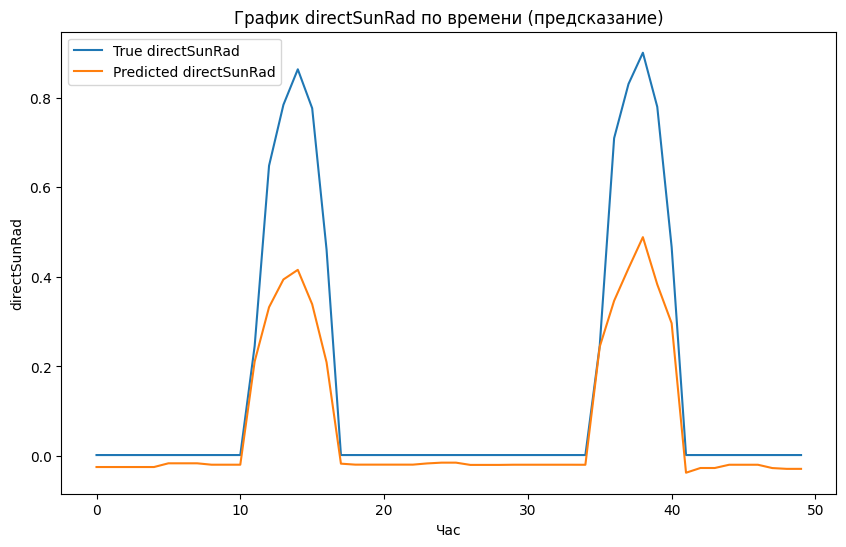

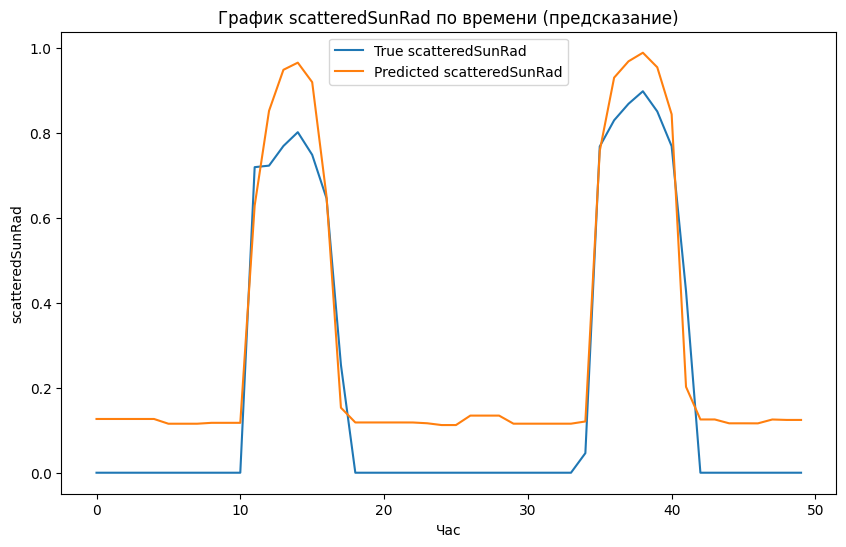

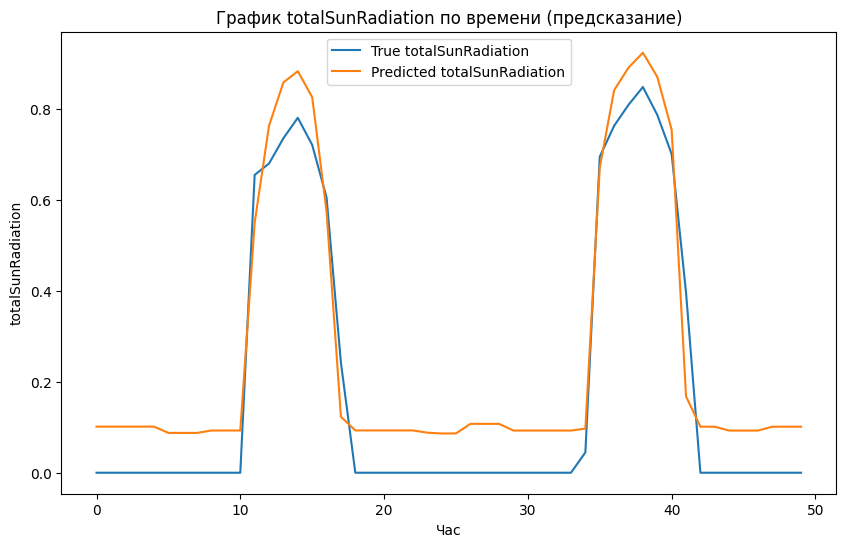

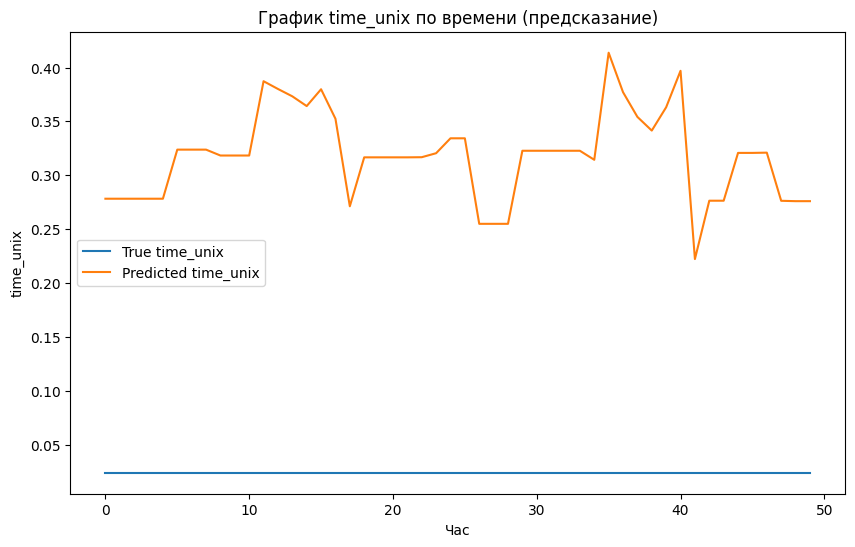

In [ ]:
# Загрузка данных из таблицы irkutsk
query_irkutsk = "SELECT * FROM irkutsk"
data_irkutsk = pd.read_sql(query_irkutsk, conn)

# Замена 'None' на NaN
data_irkutsk.replace('None', pd.NA, inplace=True)

# Преобразование времени в метки времени Unix
data_irkutsk['hourNumber'] = pd.to_datetime(data_irkutsk['hourNumber'])
data_irkutsk['time_unix'] = data_irkutsk['hourNumber'].astype(int) // 10**9  # Преобразование в секунды

# Удаление столбцов, которые не являются признаками для предсказания (например, идентификаторы и временные метки)
columns_to_exclude_irkutsk = ['hourNumber']  # Укажите столбцы, которые не нужны для предсказания
X_irkutsk = data_irkutsk.drop(columns=columns_to_exclude_irkutsk).values

# Используем SimpleImputer для заполнения пропущенных значений медианой
imputer_irkutsk = SimpleImputer(strategy='median')
X_imputed_irkutsk = imputer_irkutsk.fit_transform(X_irkutsk)

# Преобразуем обратно в DataFrame
data_imputed_irkutsk = pd.DataFrame(data=X_imputed_irkutsk, columns=data_irkutsk.columns[1:])

# Используем Йео-Джонсона для преобразования
for column in data_imputed_irkutsk.columns:
    data_imputed_irkutsk[column], _ = yeojohnson(data_imputed_irkutsk[column] + 1)  # Добавляем 1, чтобы избежать ошибки при логарифмировании нулевых значений

# Масштабирование данных
X_irkutsk_scaled = scaler.transform(data_imputed_irkutsk)

# Ограничение данных до 50 строк
X_irkutsk_50 = X_irkutsk_scaled[:50]

# Прогнозирование на тестовых данных
predictions_irkutsk = model.predict(X_irkutsk_50)

# Построение графиков для каждого числового признака
for i, column in enumerate(data_irkutsk.columns[1:]):
    plt.figure(figsize=(10, 6))
    plt.plot(X_irkutsk_50[:, i], label=f'True {column}')
    plt.plot(predictions_irkutsk[:, i], label=f'Predicted {column}')
    plt.title(f'График {column} по времени (предсказание)')
    plt.xlabel('Час')
    plt.ylabel(column)
    plt.legend()
    plt.show()


Модель GRU

4/4 [==============================] - 0s 7ms/step


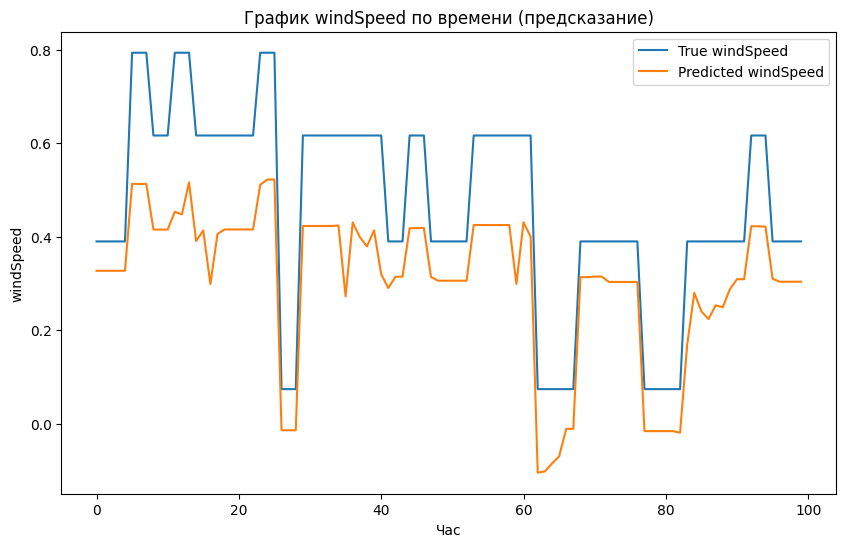

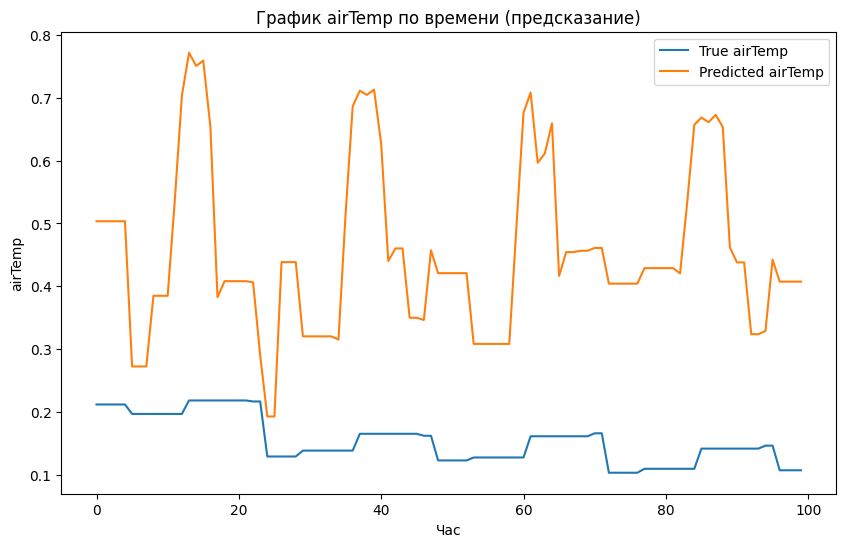

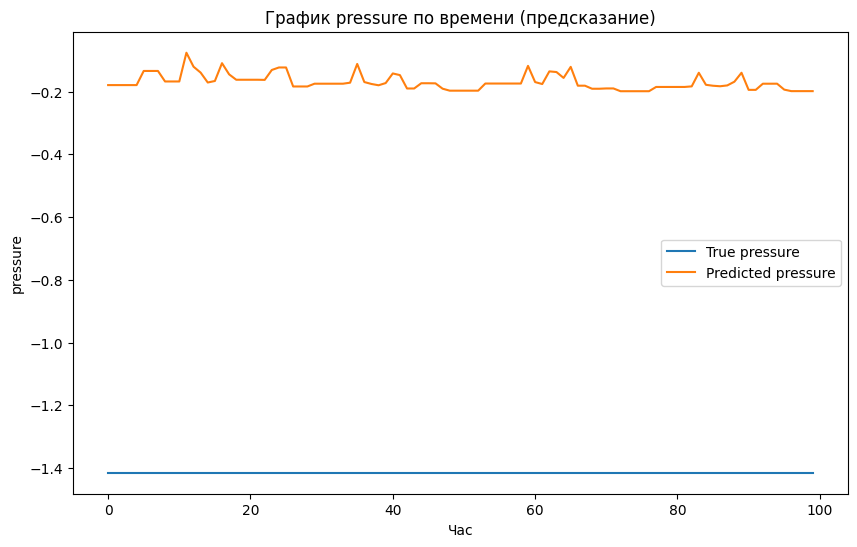

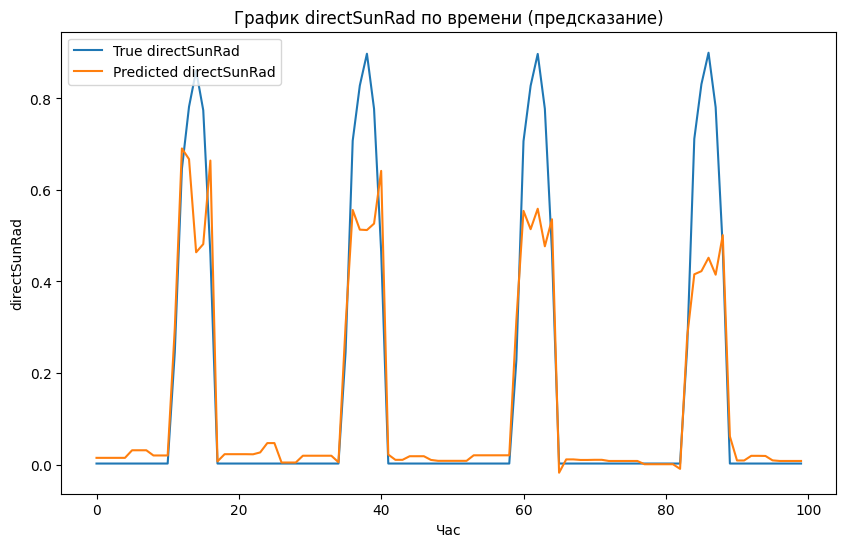

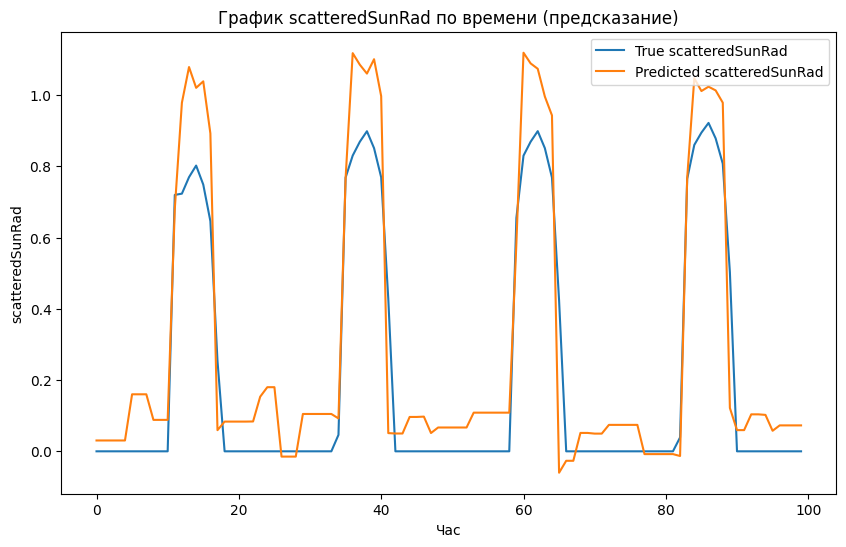

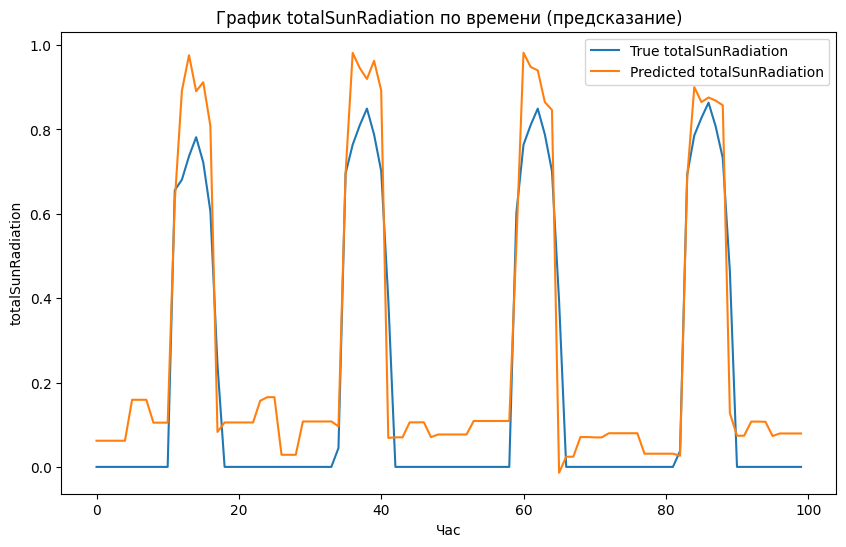

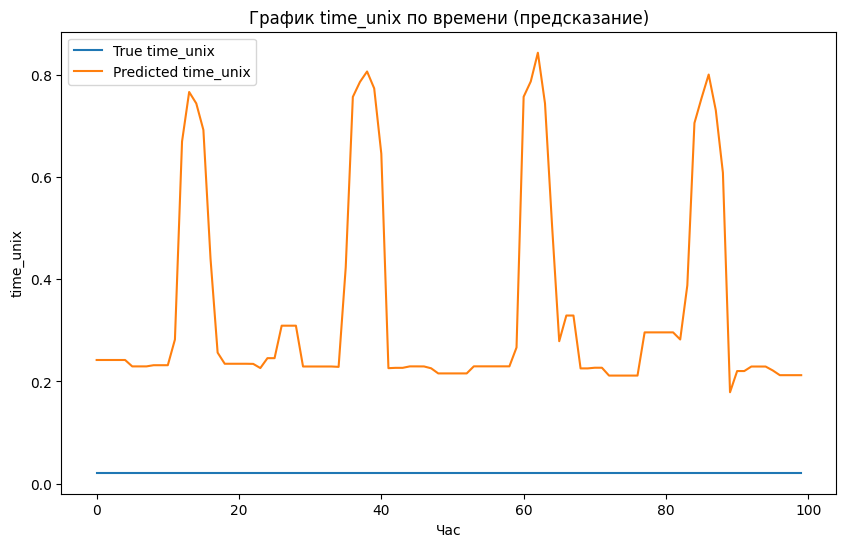

In [ ]:
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from scipy.stats import yeojohnson
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

# Подключение к базе данных SQLite
conn = sqlite3.connect('data.db')

# Загрузка данных из базы данных в DataFrame с помощью pandas
query = """
    SELECT * FROM babushkin UNION ALL
    SELECT * FROM baikalsk UNION ALL
    SELECT * FROM barguzin UNION ALL
    SELECT * FROM bolshoeGoloustnoye UNION ALL
    SELECT * FROM goryachinsk UNION ALL
    SELECT * FROM irkutsk UNION ALL
    SELECT * FROM kabansk UNION ALL
    SELECT * FROM karam UNION ALL
    SELECT * FROM kultuk UNION ALL
    SELECT * FROM kurumkan UNION ALL
    SELECT * FROM nizhneangarsk UNION ALL
    SELECT * FROM tanhoi UNION ALL
    SELECT * FROM tirka UNION ALL
    SELECT * FROM uzury
"""
data = pd.read_sql(query, conn)

# Замена 'None' на NaN
data.replace('None', pd.NA, inplace=True)

# Преобразование времени в метки времени Unix
data['hourNumber'] = pd.to_datetime(data['hourNumber'])
data['time_unix'] = data['hourNumber'].astype(int) // 10**9  # Преобразование в секунды

# Удаление столбцов, которые не являются признаками для предсказания (например, идентификаторы и временные метки)
columns_to_exclude = ['hourNumber']  # Укажите столбцы, которые не нужны для предсказания
X = data.drop(columns=columns_to_exclude).values

# Используем SimpleImputer для заполнения пропущенных значений медианой
imputer = SimpleImputer(strategy='median')
X_imputed = imputer.fit_transform(X)

# Преобразуем обратно в DataFrame
data_imputed = pd.DataFrame(data=X_imputed, columns=data.columns[1:])

# Используем Йео-Джонсона для преобразования
for column in data_imputed.columns:
    data_imputed[column], _ = yeojohnson(data_imputed[column] + 1)  # Добавляем 1, чтобы избежать ошибки при логарифмировании нулевых значений

# Масштабирование данных
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(data_imputed)

# Разделение данных на обучающий и тестовый наборы
X_train, X_test = train_test_split(X_scaled, test_size=0.2, random_state=42)

# Создание модели GRU
model = Sequential()
model.add(GRU(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(GRU(units=50, return_sequences=True))
model.add(Dropout(0.2))
model.add(GRU(units=50))
model.add(Dropout(0.2))
model.add(Dense(units=X_train.shape[1]))  # Количество нейронов в выходном слое равно количеству признаков

# Компиляция модели
model.compile(optimizer='adam', loss='mean_squared_error')

# Обучение модели
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
model.fit(X_train, X_train, epochs=50, batch_size=32, validation_data=(X_test, X_test), callbacks=[early_stopping])
# Прогнозирование на тестовых данных
# Прогнозирование на тестовых данных
predictions = model.predict(X_test[:50, :])

# Построение графиков для каждого числового признака
for i, column in enumerate(data.columns[1:]):
    plt.figure(figsize=(10, 6))
    plt.plot(X_test[:50, i], label=f'True {column}')
    plt.plot(predictions[:, i], label=f'Predicted {column}')
    plt.title(f'График {column} по времени (предсказание)')
    plt.xlabel('Час')
    plt.ylabel(column)
    plt.legend()
    plt.show()

# Загрузка данных из таблицы irkutsk
query_irkutsk = "SELECT * FROM irkutsk"
data_irkutsk = pd.read_sql(query_irkutsk, conn)

# Замена 'None' на NaN
data_irkutsk.replace('None', pd.NA, inplace=True)

# Преобразование времени в метки времени Unix
data_irkutsk['hourNumber'] = pd.to_datetime(data_irkutsk['hourNumber'])
data_irkutsk['time_unix'] = data_irkutsk['hourNumber'].astype(int) // 10**9  # Преобразование в секунды

# Удаление столбцов, которые не являются признаками для предсказания (например, идентификаторы и временные метки)
columns_to_exclude_irkutsk = ['hourNumber']  # Укажите столбцы, которые не нужны для предсказания
X_irkutsk = data_irkutsk.drop(columns=columns_to_exclude_irkutsk).values

# Используем SimpleImputer для заполнения пропущенных значений медианой
imputer_irkutsk = SimpleImputer(strategy='median')
X_imputed_irkutsk = imputer_irkutsk.fit_transform(X_irkutsk)

# Преобразуем обратно в DataFrame
data_imputed_irkutsk = pd.DataFrame(data=X_imputed_irkutsk, columns=data_irkutsk.columns[1:])

# Используем Йео-Джонсона для преобразования
for column in data_imputed_irkutsk.columns:
    data_imputed_irkutsk[column], _ = yeojohnson(data_imputed_irkutsk[column] + 1)

# Масштабирование данных
X_irkutsk_scaled = scaler.transform(data_imputed_irkutsk)

# Ограничение данных до 50 строк
X_irkutsk_50 = X_irkutsk_scaled[:100]

# Прогнозирование на тестовых данных
predictions_irkutsk = model.predict(X_irkutsk_50)

# Построение графиков для каждого числового признака
for i, column in enumerate(data_irkutsk.columns[1:]):
    plt.figure(figsize=(10, 6))
    plt.plot(X_irkutsk_50[:, i], label=f'True {column}')
    plt.plot(predictions_irkutsk[:, i], label=f'Predicted {column}')
    plt.title(f'График {column} по времени (предсказание)')
    plt.xlabel('Час')
    plt.ylabel(column)
    plt.legend()
    plt.show()




Модель трансформера

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Dropout, MultiHeadAttention, LayerNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from scipy.stats import yeojohnson
import numpy as np
import pandas as pd
import sqlite3

# Подключение к базе данных SQLite
conn = sqlite3.connect('data.db')

# Загрузка данных из базы данных в DataFrame с помощью pandas
query = """
    SELECT * FROM babushkin UNION ALL
    SELECT * FROM baikalsk UNION ALL
    SELECT * FROM barguzin UNION ALL
    SELECT * FROM bolshoeGoloustnoye UNION ALL
    SELECT * FROM goryachinsk UNION ALL
    SELECT * FROM irkutsk UNION ALL
    SELECT * FROM kabansk UNION ALL
    SELECT * FROM karam UNION ALL
    SELECT * FROM kultuk UNION ALL
    SELECT * FROM kurumkan UNION ALL
    SELECT * FROM nizhneangarsk UNION ALL
    SELECT * FROM tanhoi UNION ALL
    SELECT * FROM tirka UNION ALL
    SELECT * FROM uzury
"""
data = pd.read_sql(query, conn)

# Замена 'None' на NaN
data.replace('None', pd.NA, inplace=True)

# Преобразование времени в метки времени Unix
data['hourNumber'] = pd.to_datetime(data['hourNumber'])
data['time_unix'] = data['hourNumber'].astype(int) // 10**9  # Преобразование в секунды

# Удаление столбцов, которые не являются признаками для предсказания (например, идентификаторы и временные метки)
columns_to_exclude = ['hourNumber']  # Укажите столбцы, которые не нужны для предсказания

# Применение Йео-Джонсона к каждому столбцу после заполнения пропусков
for column in data.columns:
    if column not in columns_to_exclude:
        data[column], _ = yeojohnson(data[column] + 1)  # Добавляем 1, чтобы избежать ошибки при логарифмировании нулевых значений

# Масштабирование данных
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(data.drop(columns=columns_to_exclude).values)

# Создание лагов и объясняющих факторов
lags = 3  # Количество лагов
X_lagged = np.zeros((X_scaled.shape[0] - lags, X_scaled.shape[1] * lags))
y_target = np.zeros((X_scaled.shape[0] - lags, X_scaled.shape[1]))

for i in range(lags, X_scaled.shape[0]):
    X_lagged[i - lags, :] = X_scaled[i - lags:i, :].flatten()
    y_target[i - lags, :] = X_scaled[i, :]

# Разделение данных на обучающий и тестовый наборы
X_train, X_test, y_train, y_test = train_test_split(X_lagged, y_target, test_size=0.2, random_state=42)

# Преобразование данных в формат, подходящий для модели трансформера
X_train_transformer = X_train.reshape((X_train.shape[0], lags, X_scaled.shape[1]))
X_test_transformer = X_test.reshape((X_test.shape[0], lags, X_scaled.shape[1]))

# Создание модели трансформера
def transformer_model(input_shape, output_shape):
    inputs = Input(shape=input_shape)
    x = MultiHeadAttention(num_heads=2, key_dim=8)(inputs, inputs)
    x = Dropout(0.1)(x)
    x = LayerNormalization(epsilon=1e-6)(x)
    x = Dense(32, activation='relu')(x)
    x = Dropout(0.1)(x)
    x = LayerNormalization(epsilon=1e-6)(x)
    x = Dense(output_shape, activation='linear')(x)

    model = Model(inputs=inputs, outputs=x)
    model.compile(optimizer=Adam(learning_rate=0.001), loss=MeanSquaredError())
    return model

# Создание и обучение модели
model = transformer_model(input_shape=(lags, X_scaled.shape[1]), output_shape=X_scaled.shape[1])
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
model.fit(X_train_transformer, y_train, epochs=50, batch_size=32, validation_data=(X_test_transformer, y_test), callbacks=[early_stopping])


визуализация результатов обученной модели на тестовых данных иркутска за 24 часа

In [ ]:
# Загрузка данных из таблицы testirk для сравнения
query_testirk = "SELECT * FROM testirk"
data_testirk = pd.read_sql(query_testirk, conn)

# Загрузка истинных значений для сравнения
query_testirk2 = "SELECT * FROM testirk2"
data_testirk2 = pd.read_sql(query_testirk2, conn)

# Определение столбцов для исключения из данных
columns_to_exclude_testirk = ['hourNumber']  # Укажите столбцы, которые не нужны для масштабирования
numeric_columns_testirk = data_testirk.drop(columns=columns_to_exclude_testirk).select_dtypes(include=['float64', 'int64']).columns

# Использование только числовых столбцов для обучения масштабировщика
scaler_testirk = MinMaxScaler()
scaler_testirk.fit(data_testirk[numeric_columns_testirk])  # Масштабирование данных testirk

# Масштабирование данных из testirk
X_testirk_scaled = scaler_testirk.transform(data_testirk[numeric_columns_testirk].values)

# Прогнозирование на данных из таблицы testirk
predictions_testirk = model.predict(X_testirk_scaled)

# Удаление первого столбца
predictions_testirk = predictions_testirk[:, 1:]


# Масштабирование данных из testirk2
X_testirk2_scaled = scaler_testirk.transform(data_testirk2[numeric_columns_testirk].values)

# Построение графиков для каждого числового признака
for i, column in enumerate(data_testirk2.columns):
    if column not in columns_to_exclude_testirk:
        plt.figure(figsize=(10, 6))
        plt.plot(X_testirk2_scaled[:, i], label=f'True {data.columns[i + 3]}')
        plt.plot(predictions_testirk[:, i], label=f'Predicted {data.columns[i + 3]}')
        plt.title(f'График {data.columns[i + 3]} по времени (предсказание)')
        plt.xlabel('Час')
        plt.ylabel(data.columns[i + 3])
        plt.legend()
        plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


ValueError: in user code:

    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 2440, in predict_function  *
        return step_function(self, iterator)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 2425, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 2413, in run_step  **
        outputs = model.predict_step(data)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 2381, in predict_step
        return self(x, training=False)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/input_spec.py", line 298, in assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer "sequential_1" is incompatible with the layer: expected shape=(None, 7, 1), found shape=(None, 6)
